# FBB you did not finish the assignment, why?
# I do not know how this compares to the rest of your work, but you should strive for much more. 

# you should remove my instruction cells: this should be your notebook, with your description of the exercise as a header, and your code and description of the code, and plots, and explaining why you do what you do

# without any discussion I have no idea of you deapth of understanding of the inference you re doing

# you MUST label, give titles, and decribe with captions your figure to show that you are understanding what you are doing, and to allow the reader to understand the notebook without having to read the code. The notebook is a "presentation". 

# look at my solution for this probem

# look for more comments int he cells containing FBB¶


In [4]:
# FBB there is a typo in the first cell

In [5]:
import sys
import os
import numpy 
import pylab as pl
import pandas as pd

import json
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_1.xls"
pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_1.xls")

,Table with row headers in column A and column headers in rows 10 through 11,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48
0,PINC-08. Source of Income in 2013- People 15 Y...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Data are based on the CPS ASEC sample of 68,00...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"For information on confidentiality protection,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Source: U.S. Census Bureau, Current Population...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(Numbers in thousands. People 15 Years old and...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,15 Years and Over,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,All Races,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,NaN,Mean income,NaN,Gini ratio,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror


In [7]:
allmales = {'all': pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_1.xls", header=9), 'white': pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_4.xls", header=9), 'black': pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_6.xls", header=9), 'hispanic': pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_9.xls", header=9), 'asian': pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_2_1_8.xls", header=9)}

In [8]:
type(allmales)

dict

In [9]:
allmales['all'].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,108706,4407,2665,3200,4027,4418,3333,5027,3807,...,513,626,457,12003,35228,211,50779,447,0.501,0.0033
2,Earnings,83555,3217,2326,2560,1964,3118,1505,3451,1959,...,246,559,259,10113,39903,437,54086,531,0.489,0.0039
3,..Wages and Salary,78263,2779,2184,2419,1780,2777,1365,3149,1847,...,244,540,257,9392,40298,167,54268,543,0.483,0.004
4,..Nonfarm Self-Employment,7014,1478,280,342,231,556,144,377,122,...,0,18,0,516,19557,1391,34247,1291,0.63,0.0092


In [10]:
allmales['all'].columns

Index(['Characteristic', 'Total with Income', '$1 to $2,499 or loss',
       '$2,500 to $4,999', '$5,000 to $7,499', '$7,500 to $9,999',
       '$10,000 to $12,499', '$12,500 to $14,999', '$15,000 to $17,499',
       '$17,500 to $19,999', '$20,000 to $22,499', '$22,500 to $24,999',
       '$25,000 to $27,499', '$27,500 to $29,999', '$30,000 to $32,499',
       '$32,500 to $34,999', '$35,000 to $37,499', '$37,500 to $39,999',
       '$40,000 to $42,499', '$42,500 to $44,999', '$45,000 to $47,499',
       '$47,500 to $49,999', '$50,000 to $52,499', '$52,500 to $54,999',
       '$55,000 to $57,499', '$57,500 to $59,999', '$60,000 to $62,499',
       '$62,500 to $64,999', '$65,000 to $67,499', '$67,500 to $69,999',
       '$70,000 to $72,499', '$72,500 to $74,999', '$75,000 to $77,499',
       '$77,500 to $79,999', '$80,000 to $82,499', '$82,500 to $84,999',
       '$85,000 to $87,499', '$87,500 to $89,999', '$90,000 to $92,499',
       '$92,500 to $94,999', '$95,000 to $97,499', '$97,500 

In [11]:
type(allfemales)

NameError: name 'allfemales' is not defined

In [12]:
allfemales = {'all': pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_1.xls", header=9), 'white': pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_4.xls", header=9), 'black': pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_6.xls", header=9), 'hispanic': pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_9.xls", header=9), 'asian': pd.read_excel("http://cosmo.nyu.edu/~fb55/PUI2016/data/pinc08_3_1_8.xls", header=9)}

In [13]:
allfemales['all'].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,109956,7590,4298,5557,7874,8052,5720,6768,4377,...,167,285,184,4442,22063,137,31968,250,0.495,0.0025
2,Earnings,74545,4198,3118,3269,2662,4579,1994,4134,2585,...,60,236,127,3535,27736,364,36189,307,0.466,0.0032
3,..Wages and Salary,71220,3835,2954,3005,2411,4309,1941,3908,2484,...,61,233,126,3370,28402,379,36412,316,0.461,0.0032
4,..Nonfarm Self-Employment,4694,1282,288,410,253,388,84,265,126,...,0,0,0,127,10732,399,20942,1123,0.65,0.0162


In [14]:
allfemales['all'].columns

Index(['Characteristic', 'Total with Income', '$1 to $2,499 or loss',
       '$2,500 to $4,999', '$5,000 to $7,499', '$7,500 to $9,999',
       '$10,000 to $12,499', '$12,500 to $14,999', '$15,000 to $17,499',
       '$17,500 to $19,999', '$20,000 to $22,499', '$22,500 to $24,999',
       '$25,000 to $27,499', '$27,500 to $29,999', '$30,000 to $32,499',
       '$32,500 to $34,999', '$35,000 to $37,499', '$37,500 to $39,999',
       '$40,000 to $42,499', '$42,500 to $44,999', '$45,000 to $47,499',
       '$47,500 to $49,999', '$50,000 to $52,499', '$52,500 to $54,999',
       '$55,000 to $57,499', '$57,500 to $59,999', '$60,000 to $62,499',
       '$62,500 to $64,999', '$65,000 to $67,499', '$67,500 to $69,999',
       '$70,000 to $72,499', '$72,500 to $74,999', '$75,000 to $77,499',
       '$77,500 to $79,999', '$80,000 to $82,499', '$82,500 to $84,999',
       '$85,000 to $87,499', '$87,500 to $89,999', '$90,000 to $92,499',
       '$92,500 to $94,999', '$95,000 to $97,499', '$97,500 

In [15]:
for k,v in allfemales.items():
    print("#####", k)
    print(v.describe())
for k,v in allmales.items():
    print("#####", k)
    print(v.describe())

##### black
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean         2120.260870            292.304348        141.021739   
std          3673.947011            563.958859        181.001595   
min             0.000000              0.000000          0.000000   
25%            97.500000             11.500000         11.250000   
50%           511.500000            105.000000         64.500000   
75%          2821.500000            351.500000        185.000000   
max         14346.000000           2727.000000        679.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean         140.934783        229.456522          179.021739   
std          203.026917        371.274843          321.057730   
min            0.000000          0.000000            0.000000   
25%            4.500000          6.250000         

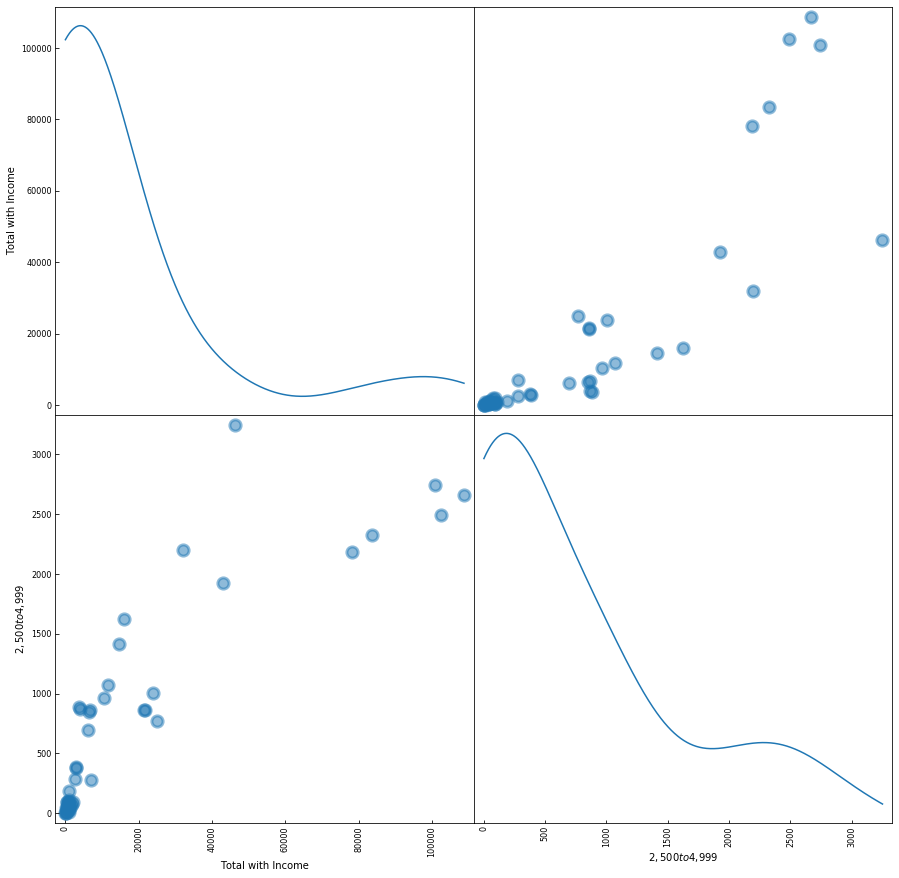

In [16]:
fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde')   

# FBB missing figure caption

In [17]:
print (allmales['asian'].shape)
allmales['asian'].applymap(np.isreal).sum()

(49, 49)


Characteristic           1
Total with Income       49
$1 to $2,499 or loss    49
$2,500 to $4,999        49
$5,000 to $7,499        49
$7,500 to $9,999        49
$10,000 to $12,499      49
$12,500 to $14,999      49
$15,000 to $17,499      49
$17,500 to $19,999      49
$20,000 to $22,499      49
$22,500 to $24,999      49
$25,000 to $27,499      49
$27,500 to $29,999      49
$30,000 to $32,499      49
$32,500 to $34,999      49
$35,000 to $37,499      49
$37,500 to $39,999      49
$40,000 to $42,499      49
$42,500 to $44,999      49
$45,000 to $47,499      49
$47,500 to $49,999      49
$50,000 to $52,499      49
$52,500 to $54,999      49
$55,000 to $57,499      49
$57,500 to $59,999      49
$60,000 to $62,499      49
$62,500 to $64,999      49
$65,000 to $67,499      49
$67,500 to $69,999      49
$70,000 to $72,499      49
$72,500 to $74,999      49
$75,000 to $77,499      49
$77,500 to $79,999      49
$80,000 to $82,499      49
$82,500 to $84,999      49
$85,000 to $87,499      49
$

In [18]:
for gender in [allmales, allfemales]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            #i f some but not all values in column are real
            #replace the non real ones
            if isreal.sum()[c] > 0 and \
            isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


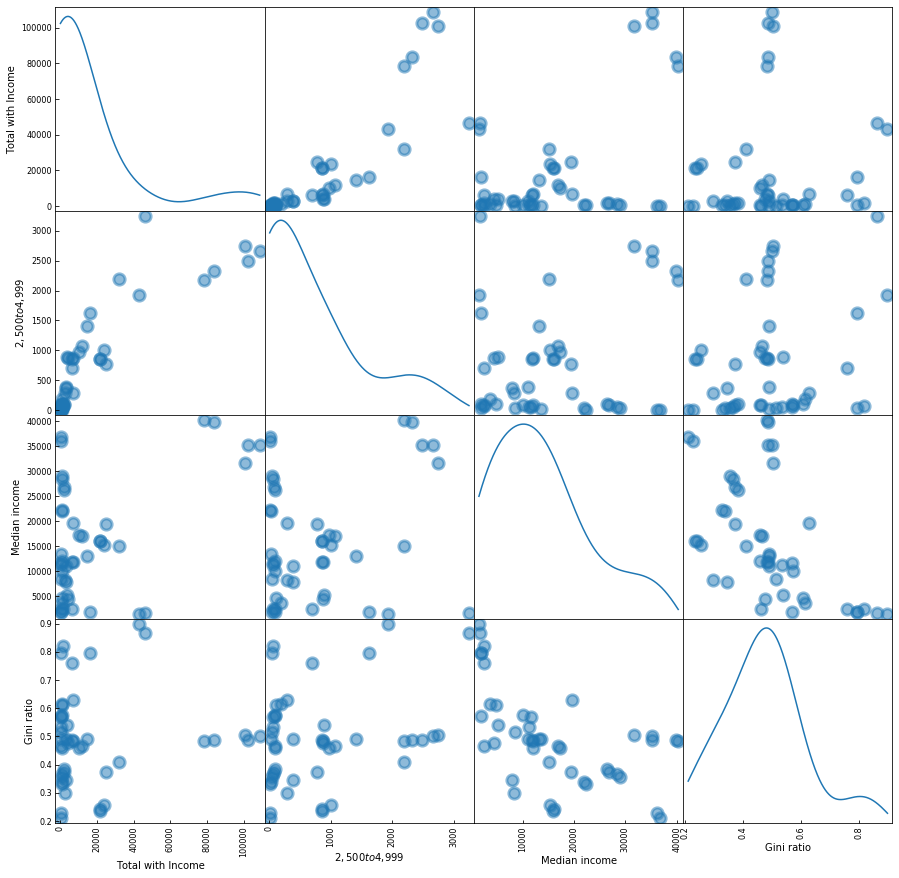

In [19]:
fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde') 

# FBB missing figure caption

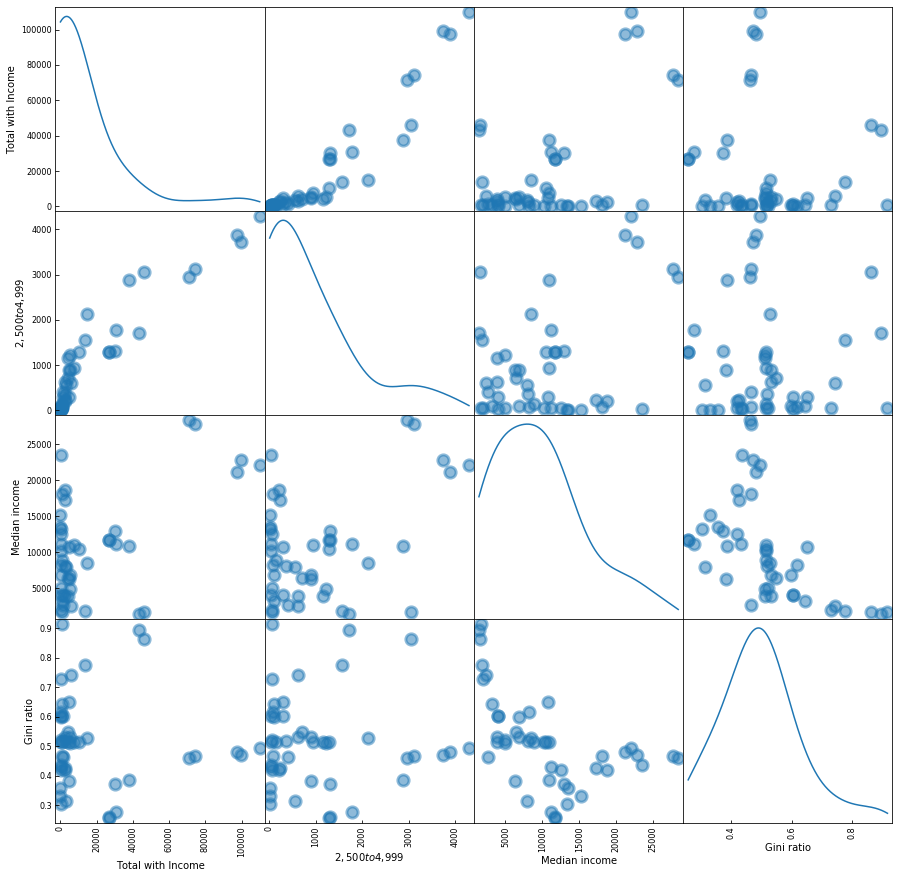

In [20]:
fig = pd.scatter_matrix(allfemales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde') 

# FBB missing figure caption

### 1-1 line: the diagonal that corresponds to men and women getting the same pay

# FBB but you are not plotting the diagonal! 

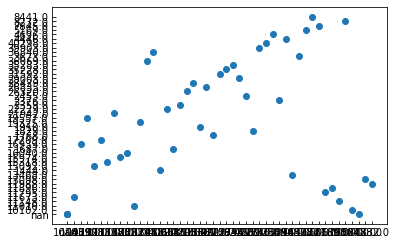

In [21]:
# dont let your lines of code exceed the size of the cell!
#pl.scatter(x=allfemales['all'][[u'Median income']], y=allmales['all'][[u'Median income']])
pl.scatter(x=allfemales['all'][[u'Median income']], 
           y=allmales['all'][[u'Median income']])


In [22]:
# FBB broken cell of code

x = allfemales['all'][[u'Median income']]
y = allmales['all'][[u'Median income']]

pl.plot(newx, np.poly1d(np.polyfit(x, y, 1))(newx)

SyntaxError: unexpected EOF while parsing (<ipython-input-22-a8afb3f1da0c>, line 4)

In [24]:
# FBB you should move imports to the top
from scipy import stats
all_males=np.array([0., allmales['all']['Median income'][1],
                    allmales['white']['Median income'][1],
                    allmales['black']['Median income'][1],
                     allmales['hispanic']['Median income'][1],
                    allmales['asian']['Median income'][1]])

all_females=np.array([0.] + [allfemales[k]['Median income'][1] \
                             for k in ['all', 'white', 'black',
                                     'hispanic','asian']])
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()
beta0, beta1

(2224.3609760454674, 0.57394829035421091)

# FBB there should be no output without explaination